In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import config

api_key = getattr(config, 'a_k', 'no_key_found')

year = getattr(config, 'y', 'no_year_found')
data_source = getattr(config, 'd_s', 'no_data_source_found')
cols_size_sex = getattr(config, 'cols_s_s', 'no_columns_found')
cols_revenue_sex = getattr(config, 'cols_r_s', 'no_columns_found')
cols_size_race = getattr(config, 'cols_s_r', 'no_columns_found')
cols_revenue_race = getattr(config, 'cols_r_r', 'no_columns_found')
state_california = getattr(config, 'sta_c', 'no_state_found')
state_new_york = getattr(config, 'sta_ny', 'no_state_found')

base_url = f'https://api.census.gov/data/{year}/{data_source}'

data_url_state_california_size_sex = f'{base_url}?get={cols_size_sex}&for=state:{state_california}&key={api_key}'
data_url_state_new_york_size_sex = f'{base_url}?get={cols_size_sex}&for=state:{state_new_york}&key={api_key}'
data_url_us_size_sex = f'{base_url}?get={cols_size_sex}&for=us:*&key={api_key}'

data_url_state_california_revenue_sex = f'{base_url}?get={cols_revenue_sex}&for=state:{state_california}&key={api_key}'
data_url_state_new_york_revenue_sex = f'{base_url}?get={cols_revenue_sex}&for=state:{state_new_york}&key={api_key}'
data_url_us_revenue_sex = f'{base_url}?get={cols_revenue_sex}&for=us:*&key={api_key}'

data_url_us_size_race = f'{base_url}?get={cols_size_race}&for=us:*&key={api_key}'

data_url_us_revenue_race = f'{base_url}?get={cols_revenue_race}&for=us:*&key={api_key}'

[["NAME","SEX","EMPSZFI","FIRMPDEMP","us"],
["United States","004","001","846433","1"],
["United States","004","611","113112","1"],
["United States","004","612","414362","1"],
["United States","004","620","147765","1"],
["United States","004","630","92532","1"],
["United States","004","641","57405","1"],
["United States","004","642","13810","1"],
["United States","004","651","5274","1"],
["United States","004","652","1541","1"],
["United States","004","657","629","1"],
["United States","001","001","5771292","1"],
["United States","001","611","730078","1"],
["United States","001","612","2826849","1"],
["United States","001","620","959641","1"],
["United States","001","630","609335","1"],
["United States","001","641","406468","1"],
["United States","001","642","126504","1"],
["United States","001","651","70299","1"],
["United States","001","652","21860","1"],
["United States","001","657","20256","1"],
["United States","002","001","1208407","1"],
["United States","002","611","158897","1"]

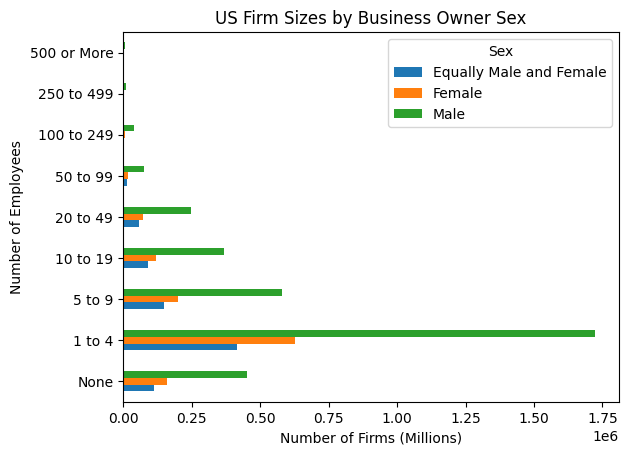

In [5]:
response = requests.get(data_url_us_size_sex)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'SEX':'Sex', 'EMPSZFI':'Size', 'FIRMPDEMP':'Count'}, inplace = True)
df['Sex'] = df['Sex'].replace('001', 'Total').replace('002', 'Female').replace('003', 'Male').replace('004', 'Equally Male and Female').replace('096', 'Classifiable').replace('098', 'Unclassifiable')
df['Size'] = df['Size'].replace('001', 'Total').replace('611', 'None').replace('612', '1 to 4').replace('620', '5 to 9').replace('630', '10 to 19').replace('641', '20 to 49').replace('642', '50 to 99').replace('651', '100 to 249').replace('652', '250 to 499').replace('657', '500 or More')
print(df.shape)
df_bar_1 = df[df['Sex'].str.contains('Total') == False]
df_bar = df_bar_1[df_bar_1['Size'].str.contains('Total') == False]

order = ['None', '1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', '500 or More']

df_pivot = pd.pivot_table(
    df_bar, 
    values='Count',
    index='Size',
    columns='Sex', 
    aggfunc=np.mean
).loc[order]

ax = df_pivot.plot(kind = 'barh', title = 'US Firm Sizes by Business Owner Sex')
ax.set_xlabel('Number of Firms (Millions)')
ax.set_ylabel('Number of Employees')

plt.savefig('us_size_sex.png', dpi=300, bbox_inches='tight')

[["NAME","SEX","EMPSZFI","FIRMPDEMP","state"],
["California","001","001","753343","06"],
["California","001","611","103623","06"],
["California","001","612","361351","06"],
["California","001","620","123524","06"],
["California","001","630","79391","06"],
["California","001","641","48377","06"],
["California","001","642","16540","06"],
["California","001","651","10336","06"],
["California","001","652","3828","06"],
["California","001","657","6373","06"],
["California","002","001","161766","06"],
["California","002","611","22900","06"],
["California","002","612","83160","06"],
["California","002","620","26944","06"],
["California","002","630","15586","06"],
["California","002","641","9042","06"],
["California","002","642","2502","06"],
["California","002","651","1056","06"],
["California","002","652","317","06"],
["California","002","657","262","06"],
["California","003","001","442847","06"],
["California","003","611","61609","06"],
["California","003","612","213843","06"],
["California

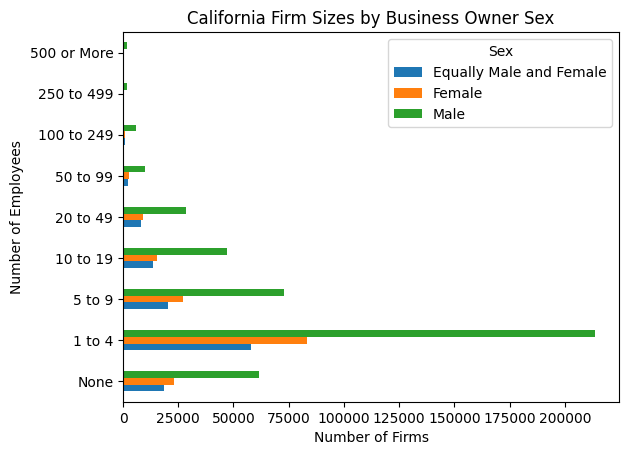

In [6]:
response = requests.get(data_url_state_california_size_sex)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'SEX':'Sex', 'EMPSZFI':'Size', 'FIRMPDEMP':'Count'}, inplace = True)
df['Sex'] = df['Sex'].replace('001', 'Total').replace('002', 'Female').replace('003', 'Male').replace('004', 'Equally Male and Female').replace('096', 'Classifiable').replace('098', 'Unclassifiable')
df['Size'] = df['Size'].replace('001', 'Total').replace('611', 'None').replace('612', '1 to 4').replace('620', '5 to 9').replace('630', '10 to 19').replace('641', '20 to 49').replace('642', '50 to 99').replace('651', '100 to 249').replace('652', '250 to 499').replace('657', '500 or More')
print(df.shape)
df_bar_1 = df[df['Sex'].str.contains('Total') == False]
df_bar = df_bar_1[df_bar_1['Size'].str.contains('Total') == False]
df_bar

order = ['None', '1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', '500 or More']

df_pivot = pd.pivot_table(
    df_bar, 
    values='Count',
    index='Size',
    columns='Sex', 
    aggfunc=np.mean
).loc[order]

ax = df_pivot.plot(kind = 'barh', title = 'California Firm Sizes by Business Owner Sex')
ax.set_xlabel('Number of Firms')
ax.set_ylabel('Number of Employees')

plt.savefig('california_size_sex.png', dpi=300, bbox_inches='tight')

[["NAME","SEX","EMPSZFI","FIRMPDEMP","state"],
["New York","001","001","444674","36"],
["New York","001","611","56721","36"],
["New York","001","612","234670","36"],
["New York","001","620","66649","36"],
["New York","001","630","39467","36"],
["New York","001","641","25798","36"],
["New York","001","642","8765","36"],
["New York","001","651","5224","36"],
["New York","001","652","2340","36"],
["New York","001","657","5036","36"],
["New York","002","001","92529","36"],
["New York","002","611","12348","36"],
["New York","002","612","52917","36"],
["New York","002","620","13954","36"],
["New York","002","630","7520","36"],
["New York","002","641","3960","36"],
["New York","002","642","977","36"],
["New York","002","651","422","36"],
["New York","002","652","0","36"],
["New York","002","657","223","36"],
["New York","003","001","294329","36"],
["New York","003","611","38381","36"],
["New York","003","612","155789","36"],
["New York","003","620","44221","36"],
["New York","003","630","2666

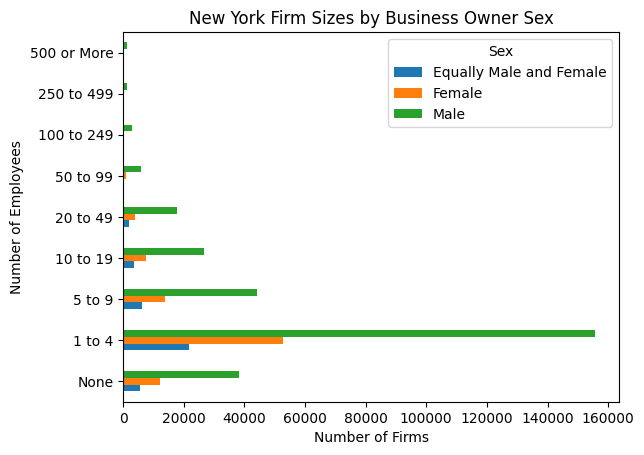

In [7]:
response = requests.get(data_url_state_new_york_size_sex)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'SEX':'Sex', 'EMPSZFI':'Size', 'FIRMPDEMP':'Count'}, inplace = True)
df['Sex'] = df['Sex'].replace('001', 'Total').replace('002', 'Female').replace('003', 'Male').replace('004', 'Equally Male and Female').replace('096', 'Classifiable').replace('098', 'Unclassifiable')
df['Size'] = df['Size'].replace('001', 'Total').replace('611', 'None').replace('612', '1 to 4').replace('620', '5 to 9').replace('630', '10 to 19').replace('641', '20 to 49').replace('642', '50 to 99').replace('651', '100 to 249').replace('652', '250 to 499').replace('657', '500 or More')
print(df.shape)
df_bar_1 = df[df['Sex'].str.contains('Total') == False]
df_bar = df_bar_1[df_bar_1['Size'].str.contains('Total') == False]
df_bar

order = ['None', '1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', '500 or More']

df_pivot = pd.pivot_table(
    df_bar, 
    values='Count',
    index='Size',
    columns='Sex', 
    aggfunc=np.mean
).loc[order]

ax = df_pivot.plot(kind = 'barh', title = 'New York Firm Sizes by Business Owner Sex')
ax.set_xlabel('Number of Firms')
ax.set_ylabel('Number of Employees')

plt.savefig('new_york_size_sex.png', dpi=300, bbox_inches='tight')

[["NAME","SEX","RCPSZFI","FIRMPDEMP","us"],
["United States","003","521","123061","1"],
["United States","003","522","263504","1"],
["United States","003","523","657068","1"],
["United States","003","525","673390","1"],
["United States","003","531","604348","1"],
["United States","003","532","1078302","1"],
["United States","004","001","846433","1"],
["United States","004","511","4966","1"],
["United States","004","518","6023","1"],
["United States","004","519","17725","1"],
["United States","004","521","33188","1"],
["United States","004","522","70859","1"],
["United States","004","523","171124","1"],
["United States","004","525","173174","1"],
["United States","004","531","151417","1"],
["United States","004","532","217954","1"],
["United States","001","001","5771292","1"],
["United States","001","511","35874","1"],
["United States","001","518","40674","1"],
["United States","001","519","115312","1"],
["United States","001","521","221801","1"],
["United States","001","522","477828","

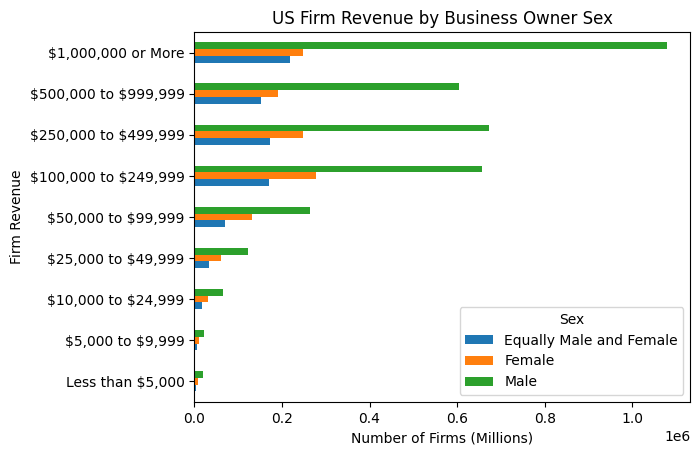

In [8]:
response = requests.get(data_url_us_revenue_sex)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'SEX':'Sex', 'RCPSZFI':'Revenue', 'FIRMPDEMP':'Count'}, inplace = True)
df['Sex'] = df['Sex'].replace('001', 'Total').replace('002', 'Female').replace('003', 'Male').replace('004', 'Equally Male and Female').replace('096', 'Classifiable').replace('098', 'Unclassifiable')
df['Revenue'] = df['Revenue'].replace('001', 'Total').replace('511', 'Less than \$5,000').replace('518', '\$5,000 to \$9,999').replace('519', '\$10,000 to \$24,999').replace('521', '\$25,000 to \$49,999').replace('522', '\$50,000 to \$99,999').replace('523', '\$100,000 to \$249,999').replace('525', '\$250,000 to \$499,999').replace('531', '\$500,000 to \$999,999').replace('532', '\$1,000,000 or More')
print(df.shape)
df_bar_1 = df[df['Sex'].str.contains('Total') == False]
df_bar = df_bar_1[df_bar_1['Revenue'].str.contains('Total') == False]

order = ['Less than \$5,000', '\$5,000 to \$9,999', '\$10,000 to \$24,999', '\$25,000 to \$49,999', '\$50,000 to \$99,999', '\$100,000 to \$249,999', '\$250,000 to \$499,999', '\$500,000 to \$999,999', '\$1,000,000 or More']

df_pivot = pd.pivot_table(
    df_bar, 
    values='Count',
    index='Revenue',
    columns='Sex', 
    aggfunc=np.mean
).loc[order]

ax = df_pivot.plot(kind = 'barh', title = 'US Firm Revenue by Business Owner Sex')
ax.set_xlabel('Number of Firms (Millions)')
ax.set_ylabel('Firm Revenue')

plt.savefig('us_revenue_sex.png', dpi=300, bbox_inches='tight')

[["NAME","SEX","RCPSZFI","FIRMPDEMP","state"],
["California","001","001","753343","06"],
["California","001","511","4145","06"],
["California","001","518","3936","06"],
["California","001","519","11357","06"],
["California","001","521","22978","06"],
["California","001","522","51176","06"],
["California","001","523","135915","06"],
["California","001","525","149598","06"],
["California","001","531","134131","06"],
["California","001","532","240105","06"],
["California","002","001","161766","06"],
["California","002","511","995","06"],
["California","002","518","964","06"],
["California","002","519","3077","06"],
["California","002","521","6640","06"],
["California","002","522","13956","06"],
["California","002","523","35255","06"],
["California","002","525","35702","06"],
["California","002","531","27432","06"],
["California","002","532","37742","06"],
["California","003","001","442847","06"],
["California","003","511","2234","06"],
["California","003","518","2357","06"],
["California"

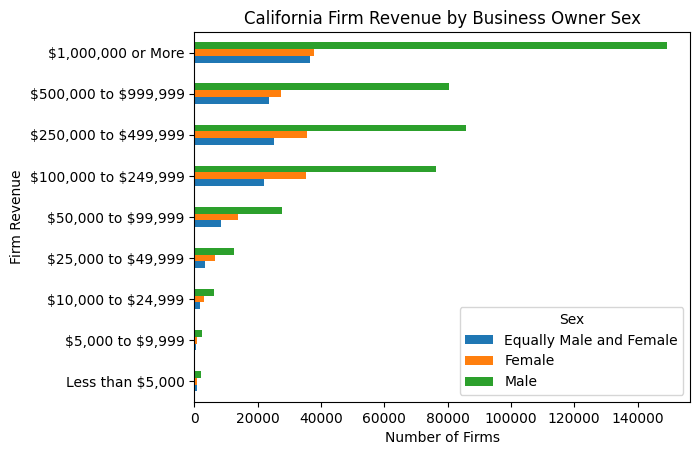

In [9]:
response = requests.get(data_url_state_california_revenue_sex)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'SEX':'Sex', 'RCPSZFI':'Revenue', 'FIRMPDEMP':'Count'}, inplace = True)
df['Sex'] = df['Sex'].replace('001', 'Total').replace('002', 'Female').replace('003', 'Male').replace('004', 'Equally Male and Female').replace('096', 'Classifiable').replace('098', 'Unclassifiable')
df['Revenue'] = df['Revenue'].replace('001', 'Total').replace('511', 'Less than \$5,000').replace('518', '\$5,000 to \$9,999').replace('519', '\$10,000 to \$24,999').replace('521', '\$25,000 to \$49,999').replace('522', '\$50,000 to \$99,999').replace('523', '\$100,000 to \$249,999').replace('525', '\$250,000 to \$499,999').replace('531', '\$500,000 to \$999,999').replace('532', '\$1,000,000 or More')
print(df.shape)
df_bar_1 = df[df['Sex'].str.contains('Total') == False]
df_bar = df_bar_1[df_bar_1['Revenue'].str.contains('Total') == False]

order = ['Less than \$5,000', '\$5,000 to \$9,999', '\$10,000 to \$24,999', '\$25,000 to \$49,999', '\$50,000 to \$99,999', '\$100,000 to \$249,999', '\$250,000 to \$499,999', '\$500,000 to \$999,999', '\$1,000,000 or More']

df_pivot = pd.pivot_table(
    df_bar, 
    values='Count',
    index='Revenue',
    columns='Sex', 
    aggfunc=np.mean
).loc[order]

ax = df_pivot.plot(kind = 'barh', title = 'California Firm Revenue by Business Owner Sex')
ax.set_xlabel('Number of Firms')
ax.set_ylabel('Firm Revenue')

plt.savefig('california_revenue_sex.png', dpi=300, bbox_inches='tight')

[["NAME","SEX","RCPSZFI","FIRMPDEMP","state"],
["New York","001","001","444674","36"],
["New York","001","511","2114","36"],
["New York","001","518","3047","36"],
["New York","001","519","8475","36"],
["New York","001","521","17509","36"],
["New York","001","522","40377","36"],
["New York","001","523","88364","36"],
["New York","001","525","86351","36"],
["New York","001","531","71914","36"],
["New York","001","532","126516","36"],
["New York","002","001","92529","36"],
["New York","002","511","408","36"],
["New York","002","518","789","36"],
["New York","002","519","1934","36"],
["New York","002","521","4789","36"],
["New York","002","522","11328","36"],
["New York","002","523","22179","36"],
["New York","002","525","19320","36"],
["New York","002","531","13814","36"],
["New York","002","532","17970","36"],
["New York","003","001","294329","36"],
["New York","003","511","1589","36"],
["New York","003","518","1984","36"],
["New York","003","519","5540","36"],
["New York","003","521","1

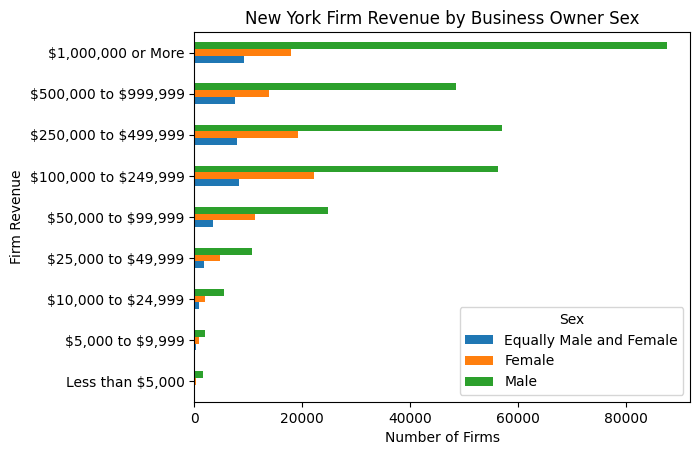

In [10]:
response = requests.get(data_url_state_new_york_revenue_sex)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'SEX':'Sex', 'RCPSZFI':'Revenue', 'FIRMPDEMP':'Count'}, inplace = True)
df['Sex'] = df['Sex'].replace('001', 'Total').replace('002', 'Female').replace('003', 'Male').replace('004', 'Equally Male and Female').replace('096', 'Classifiable').replace('098', 'Unclassifiable')
df['Revenue'] = df['Revenue'].replace('001', 'Total').replace('511', 'Less than \$5,000').replace('518', '\$5,000 to \$9,999').replace('519', '\$10,000 to \$24,999').replace('521', '\$25,000 to \$49,999').replace('522', '\$50,000 to \$99,999').replace('523', '\$100,000 to \$249,999').replace('525', '\$250,000 to \$499,999').replace('531', '\$500,000 to \$999,999').replace('532', '\$1,000,000 or More')
print(df.shape)
df_bar_1 = df[df['Sex'].str.contains('Total') == False]
df_bar = df_bar_1[df_bar_1['Revenue'].str.contains('Total') == False]

order = ['Less than \$5,000', '\$5,000 to \$9,999', '\$10,000 to \$24,999', '\$25,000 to \$49,999', '\$50,000 to \$99,999', '\$100,000 to \$249,999', '\$250,000 to \$499,999', '\$500,000 to \$999,999', '\$1,000,000 or More']

df_pivot = pd.pivot_table(
    df_bar, 
    values='Count',
    index='Revenue',
    columns='Sex', 
    aggfunc=np.mean
).loc[order]

ax = df_pivot.plot(kind = 'barh', title = 'New York Firm Revenue by Business Owner Sex')
ax.set_xlabel('Number of Firms')
ax.set_ylabel('Firm Revenue')

plt.savefig('new_york_revenue_sex.png', dpi=300, bbox_inches='tight')

In [21]:
response = requests.get(data_url_us_size_race)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'RACE_GROUP':'Race', 'EMPSZFI':'Size', 'FIRMPDEMP':'Count'}, inplace = True)
df['Race'] = df['Race'].replace('00', 'Total').replace('30', 'White').replace('40', 'Black or African American').replace('50', 'American Indian and Alaska Native').replace('70', 'Native Hawaiian and Other Pacific Islander').replace('90', 'Minority').replace('91', 'Equally Minority and Nonminority').replace('92', 'Nonminority').replace('96', 'Classifiable').replace('98', 'Unclassifiable')
df['Size'] = df['Size'].replace('001', 'Total').replace('611', 'None').replace('612', '1 to 4').replace('620', '5 to 9').replace('630', '10 to 19').replace('641', '20 to 49').replace('642', '50 to 99').replace('651', '100 to 249').replace('652', '250 to 499').replace('657', '500 or More')
print(df.shape)

[["NAME","RACE_GROUP","EMPSZFI","FIRMPDEMP","us"],
["United States","00","001","5771292","1"],
["United States","00","611","730078","1"],
["United States","00","612","2826849","1"],
["United States","00","620","959641","1"],
["United States","00","630","609335","1"],
["United States","00","641","406468","1"],
["United States","00","642","126504","1"],
["United States","00","651","70299","1"],
["United States","00","652","21860","1"],
["United States","00","657","20256","1"],
["United States","40","001","134567","1"],
["United States","40","611","18302","1"],
["United States","40","612","70914","1"],
["United States","40","620","20647","1"],
["United States","40","630","12386","1"],
["United States","40","641","8291","1"],
["United States","40","642","2460","1"],
["United States","40","651","1114","1"],
["United States","40","652","312","1"],
["United States","40","657","138","1"],
["United States","30","001","4819100","1"],
["United States","30","611","638239","1"],
["United States","3

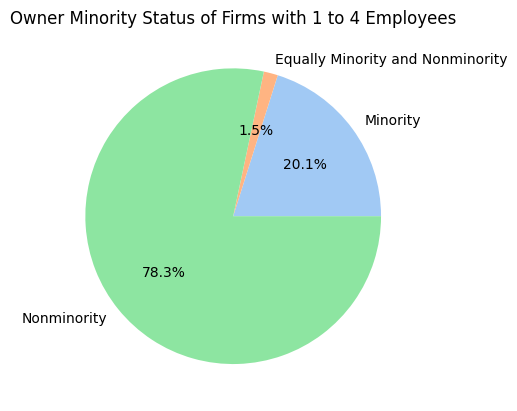

,Name,Race,Size,Count,us
62,United States,Minority,1 to 4,556915,1
72,United States,Equally Minority and Nonminority,1 to 4,42809,1
82,United States,Nonminority,1 to 4,2167612,1


In [22]:
df_pie_1 = df[df['Race'].str.contains('Total') == False]
df_pie_2 = df_pie_1[df_pie_1['Race'].str.contains('60') == False]
df_pie_3 = df_pie_2[df_pie_2['Race'].str.contains('White') == False]
df_pie_4 = df_pie_3[df_pie_3['Race'].str.contains('Black or African American') == False]
df_pie_5 = df_pie_4[df_pie_4['Race'].str.contains('American Indian and Alaska Native') == False]
df_pie_6 = df_pie_5[df_pie_5['Race'].str.contains('Native Hawaiian and Other Pacific Islander') == False]
df_pie_7 = df_pie_6[df_pie_6['Race'].str.contains('Classifiable') == False]
df_pie_8 = df_pie_7[df_pie_7['Race'].str.contains('Unclassifiable') == False]
df_pie_9 = df_pie_8[df_pie_8['Size'].str.contains('Total') == False]
df_pie_10 = df_pie_9[df_pie_9['Size'].str.contains('None') == False]
df_pie_11 = df_pie_10[df_pie_10['Size'].str.contains('5 to 9') == False]
df_pie_12 = df_pie_11[df_pie_11['Size'].str.contains('10 to 19') == False]
df_pie_13 = df_pie_12[df_pie_12['Size'].str.contains('20 to 49') == False]
df_pie_14 = df_pie_13[df_pie_13['Size'].str.contains('50 to 99') == False]
df_pie_15 = df_pie_14[df_pie_14['Size'].str.contains('100 to 249') == False]
df_pie_16 = df_pie_15[df_pie_15['Size'].str.contains('250 to 499') == False]
df_pie = df_pie_16[df_pie_16['Size'].str.contains('500 or More') == False]

colors = sns.color_palette('pastel')[0:5]

data = df_pie['Count']
labels = df_pie['Race']

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Owner Minority Status of Firms with 1 to 4 Employees')

plt.savefig('us_size_small_race.png', dpi=300, bbox_inches='tight')

plt.show()

df_pie

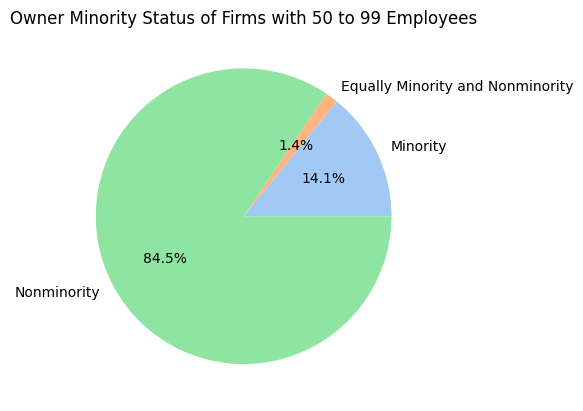

,Name,Race,Size,Count,us
66,United States,Minority,50 to 99,15385,1
76,United States,Equally Minority and Nonminority,50 to 99,1532,1
86,United States,Nonminority,50 to 99,91921,1


In [23]:
df_pie_1 = df[df['Race'].str.contains('Total') == False]
df_pie_2 = df_pie_1[df_pie_1['Race'].str.contains('60') == False]
df_pie_3 = df_pie_2[df_pie_2['Race'].str.contains('White') == False]
df_pie_4 = df_pie_3[df_pie_3['Race'].str.contains('Black or African American') == False]
df_pie_5 = df_pie_4[df_pie_4['Race'].str.contains('American Indian and Alaska Native') == False]
df_pie_6 = df_pie_5[df_pie_5['Race'].str.contains('Native Hawaiian and Other Pacific Islander') == False]
df_pie_7 = df_pie_6[df_pie_6['Race'].str.contains('Classifiable') == False]
df_pie_8 = df_pie_7[df_pie_7['Race'].str.contains('Unclassifiable') == False]
df_pie_9 = df_pie_8[df_pie_8['Size'].str.contains('Total') == False]
df_pie_10 = df_pie_9[df_pie_9['Size'].str.contains('None') == False]
df_pie_11 = df_pie_10[df_pie_10['Size'].str.contains('5 to 9') == False]
df_pie_12 = df_pie_11[df_pie_11['Size'].str.contains('10 to 19') == False]
df_pie_13 = df_pie_12[df_pie_12['Size'].str.contains('20 to 49') == False]
df_pie_14 = df_pie_13[df_pie_13['Size'].str.contains('1 to 4') == False]
df_pie_15 = df_pie_14[df_pie_14['Size'].str.contains('100 to 249') == False]
df_pie_16 = df_pie_15[df_pie_15['Size'].str.contains('250 to 499') == False]
df_pie = df_pie_16[df_pie_16['Size'].str.contains('500 or More') == False]

colors = sns.color_palette('pastel')[0:5]

data = df_pie['Count']
labels = df_pie['Race']

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Owner Minority Status of Firms with 50 to 99 Employees')

plt.savefig('us_size_medium_race.png', dpi=300, bbox_inches='tight')

plt.show()

df_pie

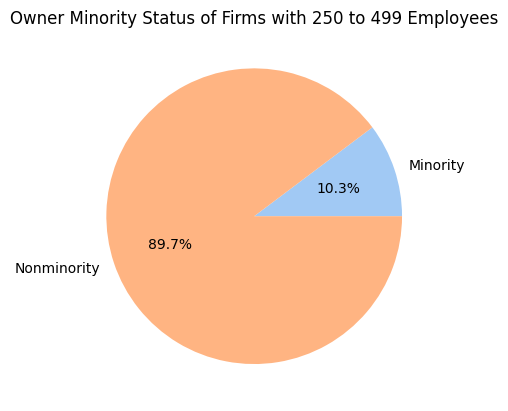

,Name,Race,Size,Count,us
68,United States,Minority,250 to 499,1420,1
88,United States,Nonminority,250 to 499,12417,1


In [24]:
df_pie_1 = df[df['Race'].str.contains('Total') == False]
df_pie_2 = df_pie_1[df_pie_1['Race'].str.contains('60') == False]
df_pie_3 = df_pie_2[df_pie_2['Race'].str.contains('White') == False]
df_pie_4 = df_pie_3[df_pie_3['Race'].str.contains('Black or African American') == False]
df_pie_5 = df_pie_4[df_pie_4['Race'].str.contains('American Indian and Alaska Native') == False]
df_pie_6 = df_pie_5[df_pie_5['Race'].str.contains('Native Hawaiian and Other Pacific Islander') == False]
df_pie_7 = df_pie_6[df_pie_6['Race'].str.contains('Classifiable') == False]
df_pie_8 = df_pie_7[df_pie_7['Race'].str.contains('Unclassifiable') == False]
df_pie_9 = df_pie_8[df_pie_8['Size'].str.contains('Total') == False]
df_pie_10 = df_pie_9[df_pie_9['Size'].str.contains('None') == False]
df_pie_11 = df_pie_10[df_pie_10['Size'].str.contains('5 to 9') == False]
df_pie_12 = df_pie_11[df_pie_11['Size'].str.contains('10 to 19') == False]
df_pie_13 = df_pie_12[df_pie_12['Size'].str.contains('20 to 49') == False]
df_pie_14 = df_pie_13[df_pie_13['Size'].str.contains('50 to 99') == False]
df_pie_15 = df_pie_14[df_pie_14['Size'].str.contains('100 to 249') == False]
df_pie_16 = df_pie_15[df_pie_15['Size'].str.contains('1 to 4') == False]
df_pie_17 = df_pie_16[df_pie_16['Size'].str.contains('500 or More') == False]
df_pie = df_pie_17[df_pie_17['Race'].str.contains('Equally Minority and Nonminority') == False]

colors = sns.color_palette('pastel')[0:5]

data = df_pie['Count']
labels = df_pie['Race']

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Owner Minority Status of Firms with 250 to 499 Employees')

plt.savefig('us_size_large_race.png', dpi=300, bbox_inches='tight')

plt.show()

df_pie

# 0% in the Minority/Nonminority field

In [25]:
response = requests.get(data_url_us_revenue_race)
print(response.text)
data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])
df.rename(columns = {'NAME':'Name', 'RACE_GROUP':'Race', 'RCPSZFI':'Revenue', 'FIRMPDEMP':'Count'}, inplace = True)
df['Race'] = df['Race'].replace('00', 'Total').replace('30', 'White').replace('40', 'Black or African American').replace('50', 'American Indian and Alaska Native').replace('70', 'Native Hawaiian and Other Pacific Islander').replace('90', 'Minority').replace('91', 'Equally Minority and Nonminority').replace('92', 'Nonminority').replace('96', 'Classifiable').replace('98', 'Unclassifiable')
df['Revenue'] = df['Revenue'].replace('001', 'Total').replace('511', 'Less than \$5,000').replace('518', '\$5,000 to \$9,999').replace('519', '\$10,000 to \$24,999').replace('521', '\$25,000 to \$49,999').replace('522', '\$50,000 to \$99,999').replace('523', '\$100,000 to \$249,999').replace('525', '\$250,000 to \$499,999').replace('531', '\$500,000 to \$999,999').replace('532', '\$1,000,000 or More')
print(df.shape)
df

[["NAME","RACE_GROUP","RCPSZFI","FIRMPDEMP","us"],
["United States","00","001","5771292","1"],
["United States","00","511","35874","1"],
["United States","00","518","40674","1"],
["United States","00","519","115312","1"],
["United States","00","521","221801","1"],
["United States","00","522","477828","1"],
["United States","00","523","1130798","1"],
["United States","00","525","1121695","1"],
["United States","00","531","972705","1"],
["United States","00","532","1654605","1"],
["United States","40","001","134567","1"],
["United States","40","511","1488","1"],
["United States","40","518","1856","1"],
["United States","40","519","4741","1"],
["United States","40","521","8474","1"],
["United States","40","522","14478","1"],
["United States","40","523","30563","1"],
["United States","40","525","27957","1"],
["United States","40","531","20165","1"],
["United States","40","532","24846","1"],
["United States","30","001","4819100","1"],
["United States","30","511","30731","1"],
["United State

,Name,Race,Revenue,Count,us
0,United States,Total,Total,5771292,1
1,United States,Total,"Less than \$5,000",35874,1
2,United States,Total,"\$5,000 to \$9,999",40674,1
3,United States,Total,"\$10,000 to \$24,999",115312,1
4,United States,Total,"\$25,000 to \$49,999",221801,1
...,...,...,...,...,...
85,United States,Minority,"\$50,000 to \$99,999",88816,1
86,United States,Minority,"\$100,000 to \$249,999",222748,1
87,United States,Minority,"\$250,000 to \$499,999",232268,1
88,United States,Minority,"\$500,000 to \$999,999",191411,1


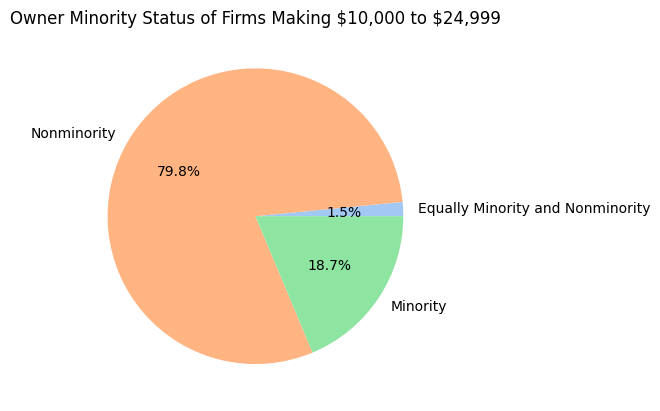

,Name,Race,Revenue,Count,us
66,United States,Equally Minority and Nonminority,"\$10,000 to \$24,999",1742,1
76,United States,Nonminority,"\$10,000 to \$24,999",90251,1
83,United States,Minority,"\$10,000 to \$24,999",21136,1


In [26]:
df_pie_1 = df[df['Race'].str.contains('Total') == False]
df_pie_2 = df_pie_1[df_pie_1['Race'].str.contains('60') == False]
df_pie_3 = df_pie_2[df_pie_2['Race'].str.contains('White') == False]
df_pie_4 = df_pie_3[df_pie_3['Race'].str.contains('Black or African American') == False]
df_pie_5 = df_pie_4[df_pie_4['Race'].str.contains('American Indian and Alaska Native') == False]
df_pie_6 = df_pie_5[df_pie_5['Race'].str.contains('Native Hawaiian and Other Pacific Islander') == False]
df_pie_7 = df_pie_6[df_pie_6['Race'].str.contains('Classifiable') == False]
df_pie_8 = df_pie_7[df_pie_7['Race'].str.contains('Unclassifiable') == False]
df_pie_9 = df_pie_8[df_pie_8['Revenue'].str.contains('Total') == False]
df_pie_10 = df_pie_9[df_pie_9['Revenue'].str.contains('5') == False]
df_pie_11 = df_pie_10[df_pie_10['Revenue'].str.contains('100') == False]
df_pie = df_pie_11[df_pie_11['Revenue'].str.contains('More') == False]

colors = sns.color_palette('pastel')[0:5]

data = df_pie['Count']
labels = df_pie['Race']

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Owner Minority Status of Firms Making \$10,000 to \$24,999')

plt.savefig('us_revenue_small_race.png', dpi=300, bbox_inches='tight')

plt.show()

df_pie

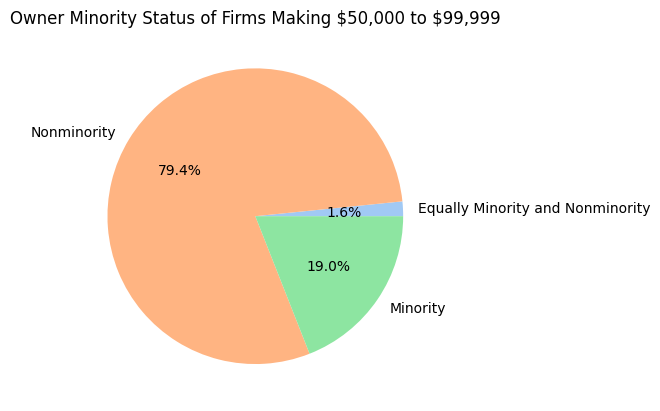

,Name,Race,Revenue,Count,us
68,United States,Equally Minority and Nonminority,"\$50,000 to \$99,999",7484,1
78,United States,Nonminority,"\$50,000 to \$99,999",370715,1
85,United States,Minority,"\$50,000 to \$99,999",88816,1


In [27]:
df_pie_1 = df[df['Race'].str.contains('Total') == False]
df_pie_2 = df_pie_1[df_pie_1['Race'].str.contains('60') == False]
df_pie_3 = df_pie_2[df_pie_2['Race'].str.contains('White') == False]
df_pie_4 = df_pie_3[df_pie_3['Race'].str.contains('Black or African American') == False]
df_pie_5 = df_pie_4[df_pie_4['Race'].str.contains('American Indian and Alaska Native') == False]
df_pie_6 = df_pie_5[df_pie_5['Race'].str.contains('Native Hawaiian and Other Pacific Islander') == False]
df_pie_7 = df_pie_6[df_pie_6['Race'].str.contains('Classifiable') == False]
df_pie_8 = df_pie_7[df_pie_7['Race'].str.contains('Unclassifiable') == False]
df_pie_9 = df_pie_8[df_pie_8['Revenue'].str.contains('Total') == False]
df_pie_10 = df_pie_9[df_pie_9['Revenue'].str.contains('4') == False]
df_pie_11 = df_pie_10[df_pie_10['Revenue'].str.contains('100') == False]
df_pie_12 = df_pie_11[df_pie_11['Revenue'].str.contains('More') == False]
df_pie_13 = df_pie_12[df_pie_12['Revenue'].str.contains('Less') == False]
df_pie_14 = df_pie_13[df_pie_13['Revenue'].str.contains('5,') == False]
df_pie = df_pie_14[df_pie_14['Revenue'].str.contains('500') == False]

colors = sns.color_palette('pastel')[0:5]

data = df_pie['Count']
labels = df_pie['Race']

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Owner Minority Status of Firms Making \$50,000 to \$99,999')

plt.savefig('us_revenue_medium_race.png', dpi=300, bbox_inches='tight')

plt.show()

df_pie

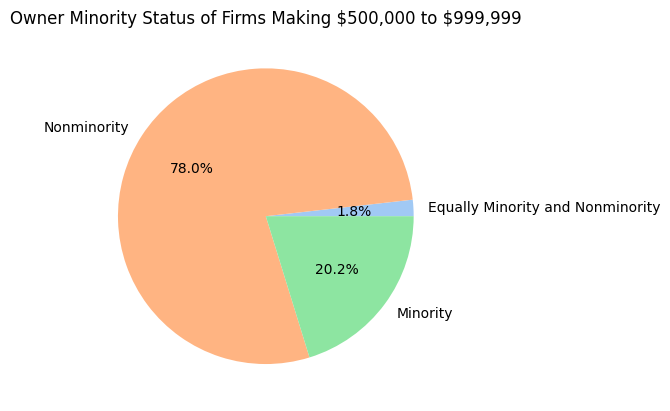

,Name,Race,Revenue,Count,us
71,United States,Equally Minority and Nonminority,"\$500,000 to \$999,999",16894,1
81,United States,Nonminority,"\$500,000 to \$999,999",738156,1
88,United States,Minority,"\$500,000 to \$999,999",191411,1


In [19]:
df_pie_1 = df[df['Race'].str.contains('Total') == False]
df_pie_2 = df_pie_1[df_pie_1['Race'].str.contains('60') == False]
df_pie_3 = df_pie_2[df_pie_2['Race'].str.contains('White') == False]
df_pie_4 = df_pie_3[df_pie_3['Race'].str.contains('Black or African American') == False]
df_pie_5 = df_pie_4[df_pie_4['Race'].str.contains('American Indian and Alaska Native') == False]
df_pie_6 = df_pie_5[df_pie_5['Race'].str.contains('Native Hawaiian and Other Pacific Islander') == False]
df_pie_7 = df_pie_6[df_pie_6['Race'].str.contains('Classifiable') == False]
df_pie_8 = df_pie_7[df_pie_7['Race'].str.contains('Unclassifiable') == False]
df_pie_9 = df_pie_8[df_pie_8['Revenue'].str.contains('Total') == False]
df_pie_10 = df_pie_9[df_pie_9['Revenue'].str.contains('4') == False]
df_pie_11 = df_pie_10[df_pie_10['Revenue'].str.contains('100') == False]
df_pie_12 = df_pie_11[df_pie_11['Revenue'].str.contains('More') == False]
df_pie_13 = df_pie_12[df_pie_12['Revenue'].str.contains('Less') == False]
df_pie_14 = df_pie_13[df_pie_13['Revenue'].str.contains('5,') == False]
df_pie_15 = df_pie_14[df_pie_14['Revenue'].str.contains('50,') == False]
df_pie = df_pie_15[df_pie_15['Revenue'].str.contains('Total') == False]

colors = sns.color_palette('pastel')[0:5]

data = df_pie['Count']
labels = df_pie['Race']

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Owner Minority Status of Firms Making \$500,000 to \$999,999')

plt.savefig('us_revenue_large_race.png', dpi=300, bbox_inches='tight')

plt.show()

df_pie